# **Visualização de Dados Utilizando Python e SQL**


<hr>


*Download* database arquivo.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-05-12 12:39:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  30.6MB/s    in 1.1s    

2022-05-12 12:39:14 (30.6 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Conectando ao database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # abrindo uma conexão com o db

Importando módulo pandas



In [ ]:
import pandas as pd

## Demo: Como executar uma SQL query


In [ ]:
# Quantidade de linhas na tabela 'master'
QUERY = """
SELECT COUNT(*) AS "Quantidade de linhas"
FROM master
"""

# o método read_sql_query executa a query e retorna os dados como um dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,Quantidade de linhas
0,11398


## Demo: Como listar todas as tabelas


In [ ]:
#Mostrar a quantidade de tables no database
QUERY = """
SELECT COUNT(name) AS Qtd_Tabelas
FROM sqlite_master
WHERE type = 'table'
"""

#lendo a query
print(pd.read_sql_query(QUERY, conn))

# Mostrar os nomes de todas as tabelas do database
QUERY = """
SELECT name AS Nome_Tabela 
FROM sqlite_master
WHERE type = 'table'
"""
# lendo a query
pd.read_sql_query(QUERY,conn)




   Qtd_Tabelas
0           24


,Nome_Tabela
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: Executando group by query


In [ ]:
# Agrupando por idade
QUERY = """
SELECT Age AS idade, COUNT(*) AS qtd_idade
FROM master
GROUP BY Age
ORDER BY Age DESC
"""
# lendo a query
pd.read_sql_query(QUERY, conn)

,idade,qtd_idade
0,99.0,1
1,72.0,1
2,71.0,2
3,69.0,1
4,67.0,1
5,66.0,1
6,65.0,2
7,63.0,7
8,62.0,5
9,61.0,10


## Demo: Como descrever as colunas de uma tabela


In [ ]:
nome_tabela = 'master'  # nome da tabela a ser descrita

QUERY = """
SELECT sql
FROM sqlite_master
WHERE name = '{}'
""".format(nome_tabela)

#lendo a query
df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

##Visualizando a distribuição dos dados

### Histogramas


Plotando histograma da coluna `ConvertedComp.` *(Por convenção, passarei, a partir daqui, a definir os nomes das variáveis em inglês)*


In [ ]:
# importando as bibliotecas necessárias 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

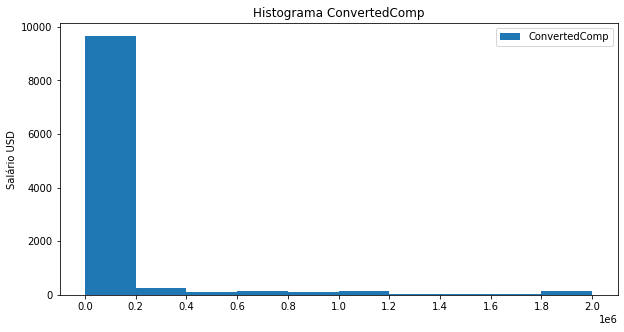

In [ ]:
# coletando os dados da coluna ConvertedComp
QUERY = """
SELECT ConvertedComp
FROM master
"""
# criando um dataframe com o resultado da query
df = pd.read_sql_query(QUERY, conn)

# criando histograma
count, bin_edges = np.histogram(df.dropna())
df.plot(kind='hist', xticks=bin_edges, figsize=(10,5))

plt.title('Histograma ConvertedComp')
plt.ylabel('Salário USD')
plt.show()


### Box Plots


Criando Box Plot da coluna `Age.`


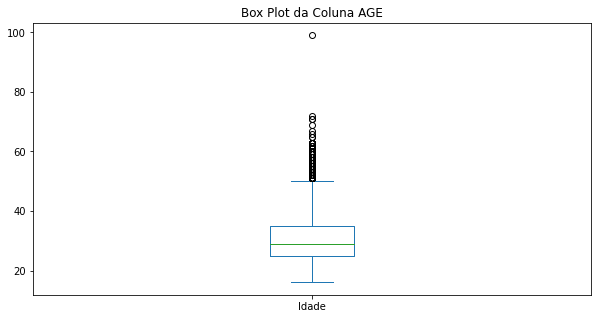

In [ ]:
# query utilizada
QUERY = """
SELECT Age AS Idade
FROM master
"""

# criando dataframe com o resultado da query
df2 = pd.read_sql_query(QUERY, conn)

# criando box plot
df2.plot(kind='box', figsize=(10,5))

plt.title('Box Plot da Coluna AGE')
plt.show()



## Visualizado relacionamento entre dados


### Scatter Plots


Criando Scatter Plot entre `Age` e `WorkWeekHrs.`


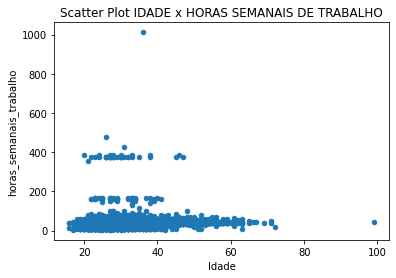

In [ ]:
# coletando dados 
QUERY = """
SELECT Age AS Idade, WorkWeekHrs AS horas_semanais_trabalho
FROM master
"""
# criando dataframe
df3 = pd.read_sql_query(QUERY, conn)

#criando scatter plot
df3.plot.scatter(x='Idade', y='horas_semanais_trabalho')
plt.title('Scatter Plot IDADE x HORAS SEMANAIS DE TRABALHO')
plt.show()

### Bubble Plots


Criando um Bubble Plot entre `WorkWeekHrs` e `CodeRevHrs`, utilizando a coluna `Age` como determinante.


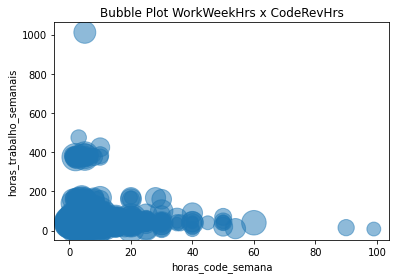

In [ ]:
# query
QUERY = """
SELECT WorkWeekHrs AS horas_trabalho_semanais, Age as idade, CodeRevHrs AS horas_code_semana
FROM master
"""
# criando um dataframe a partir da query
df4 = pd.read_sql_query(QUERY, conn)
# checando por valores nulos
df4.isna().value_counts()
# excluindo valores nulos
df4.dropna(inplace=True)
# checando valores nulos
df4.isna().value_counts()

# normalizando valores 
norm_value = (df4['idade'] - df4['idade'].min()) / (df4['idade'].max() - df4['idade'].min())

# criando bubble plot
df4.plot.scatter(x='horas_code_semana', y='horas_trabalho_semanais', s=norm_value*2000, alpha=0.5)
plt.title('Bubble Plot WorkWeekHrs x CodeRevHrs')
plt.show()

## Visualizando composição dos dados




### Pie Charts


Criando um Pie Chart com o Top 5 databases que os respondentes desejariam aprender no proximo ano.


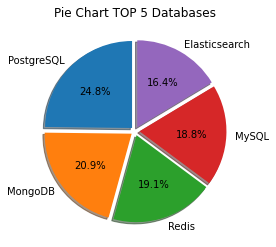

In [ ]:
# query para extração
QUERY = """
SELECT DatabaseDesireNextYear AS db_desejados, COUNT(Respondent) AS total
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY total DESC
LIMIT 5
"""
# criando dataframe a partir da query
df5 = pd.read_sql_query(QUERY, conn)
# criando pie chart
expl = [0.05,0.05,0.05,0.05,0.05]
plt.pie(df5['total'], labels=df5['db_desejados'], shadow=True, startangle=90, explode=expl, autopct='%1.1f%%')
plt.title('Pie Chart TOP 5 Databases')
plt.show()


### Stacked Charts


Criando um Stacked Chart da mediana das colunas `WorkWeekHrs` e `CodeRevHrs` para o grupo etário de 30 a 35 anos.


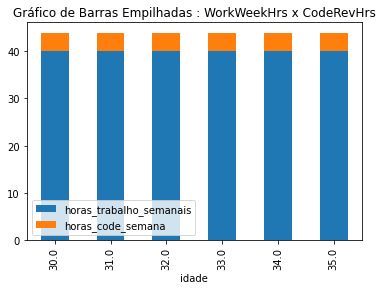

In [ ]:
# query para extração de dados do database
QUERY = """
SELECT WorkWeekHrs as horas_trabalho_semanais, CodeRevHrs AS horas_code_semana, Age AS idade
FROM master
WHERE Age BETWEEN 30 AND 35
"""
# criando dataframe a partir da query
df6 = pd.read_sql_query(QUERY, conn)
# excluindo valores nulos
df6.dropna(inplace=True)

# criando stacked chart
df_stacked = df6.groupby(['idade'])[['horas_trabalho_semanais', 'horas_code_semana']].median()
df_stacked.plot(kind="bar", stacked=True)

plt.title('Gráfico de Barras Empilhadas : WorkWeekHrs x CodeRevHrs')
plt.show()

## Visualizando comparação entre dados


### Line Chart


Plotar a median da coluna `ConvertedComp` para idades entre 25 e 30 anos.


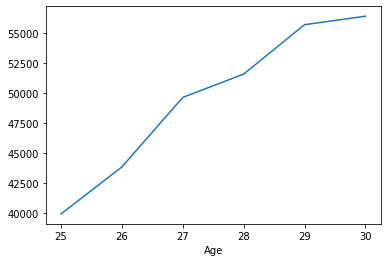

In [ ]:
# query
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""

# criando dataframe
df7 = pd.read_sql_query(QUERY, conn)
# removendo valores nulos
df7.dropna(inplace=True)

# agrupando com base na Idade e plotando o resultado
df7.groupby(['Age'])['ConvertedComp'].median().plot()
plt.show()




# Quais as linguagem de programação mais populares?




In [ ]:
# query
QUERY = """
SELECT LanguageDesireNextYear AS linguagem_desejada, COUNT(Respondent) AS total
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY total DESC
"""
df8 = pd.read_sql_query(QUERY, conn)
df8.head()

,linguagem_desejada,total
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


# Quantos respondentes atualmente trabalham com SQL?


In [ ]:
# query
QUERY = """
SELECT LanguageWorkedWith AS linguagem, COUNT(Respondent) AS total
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
HAVING LanguageWorkedWith LIKE '%SQL%'
"""

# criando dataframe
df9 = pd.read_sql_query(QUERY, conn)
df9.head()

,linguagem,total
0,SQL,7106


# Quantos respondentes trabalham EXCLUSIVAMENTE com MySQL?

In [ ]:
# query
QUERY = """
SELECT *
FROM DatabaseWorkedWith
"""

# criando dataframe
df10 = pd.read_sql_query(QUERY, conn)

df10.drop_duplicates('Respondent', keep=False).groupby('DatabaseWorkedWith').count()



,Respondent
DatabaseWorkedWith,
Cassandra,10
Couchbase,8
DynamoDB,28
Elasticsearch,27
Firebase,90
MariaDB,44
Microsoft SQL Server,845
MongoDB,170
MySQL,474


### Bar Chart


Criando um Gráfico de Barras Horizontais utlizando coluna `MainBranch.`


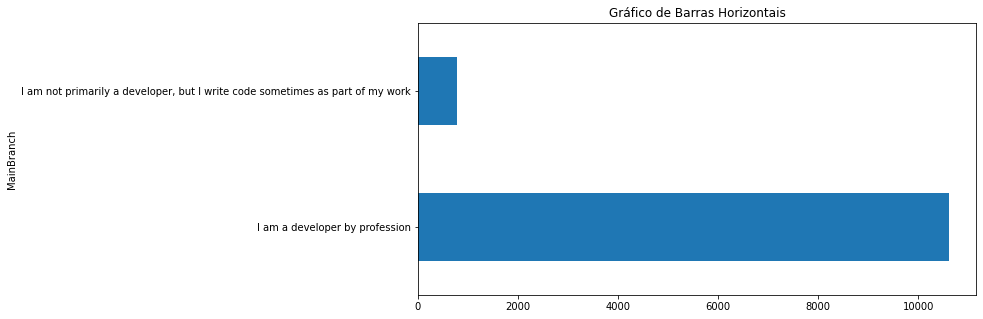

In [ ]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""

# criando dataframe a partir da query
df11 = pd.read_sql_query(QUERY, conn)
#df11.head()

# configurando e exibindo o bar chart
df11.groupby('MainBranch')['MainBranch'].count().plot(kind='barh', figsize = (10,5))

plt.title('Gráfico de Barras Horizontais')
plt.show()


# Qual o tipo mais comum de desenvolvedores?

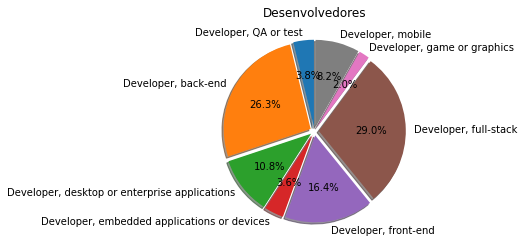

In [ ]:
QUERY = """
SELECT DevType, COUNT('Respondent') AS total
FROM DevType
GROUP BY DevType
HAVING DevType LIKE '%eloper%'
"""

df12 = pd.read_sql_query(QUERY, conn)
expl = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.pie(df12['total'], labels=df12['DevType'], shadow=True, startangle=90, explode=expl, autopct='%1.1f%%')

plt.title('Desenvolvedores')
plt.show()


Encerrando a conexão com o database

In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
